In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(10, 8), dpi=100)
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
reeses = cv2.imread(r'C:\Users\Data\computer vision\reeses_puffs.png', 0)

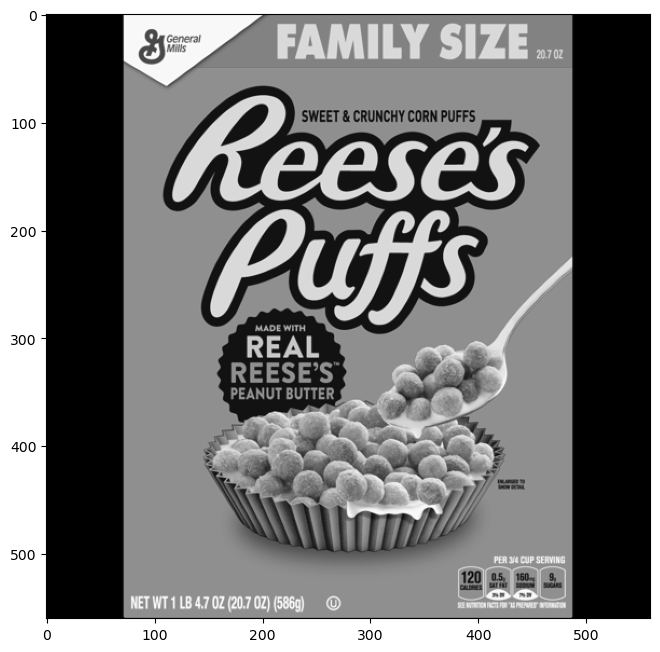

In [4]:
display(reeses,cmap='gray')

In [5]:
cereals = cv2.imread(r'C:\Users\Data\computer vision\many_cereals.jpg', 0)

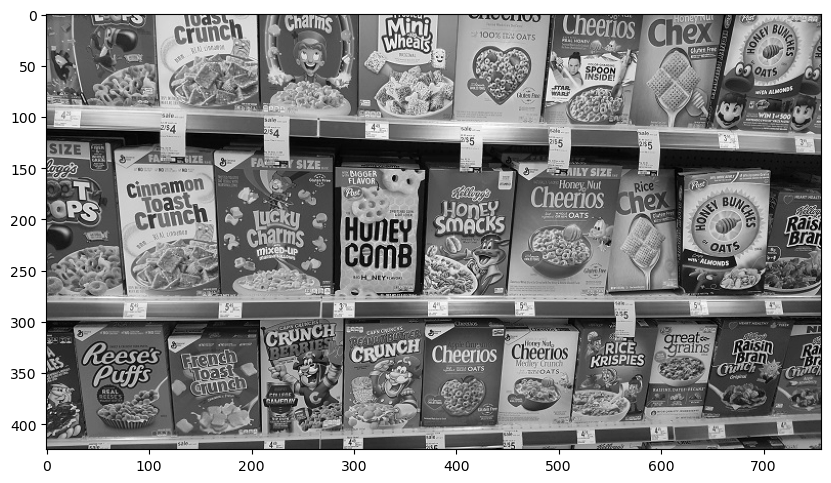

In [6]:
display(cereals, cmap='gray')

## Brute force with Detection with ORB Desriptions

In [7]:
# create a detector
orb = cv2.ORB_create()

# find the keypoint and discriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses, mask = None)
kp2, des2 = orb.detectAndCompute(cereals, mask = None)

# create BFMatches object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= True)

# Match descriptors
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

# draw  first 25 matches
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags = 2)


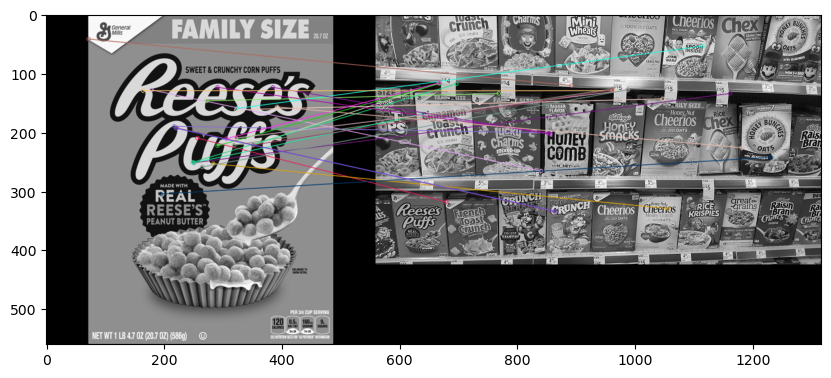

In [8]:
display(reeses_matches)

-----
-----

# Brute Force Matching with SIFT

In [9]:
# create SIFT
sift = cv2.xfeatures2d.SIFT_create()

# find keypoints and descriptors with sift
kp1, des1 = sift.detectAndCompute(reeses, mask =None)
kp2, des2 = sift.detectAndCompute(cereals, mask=None)

# BFMatches 
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k =2)

# apply
good = []

for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        
# draw sift matches
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags  = 2)

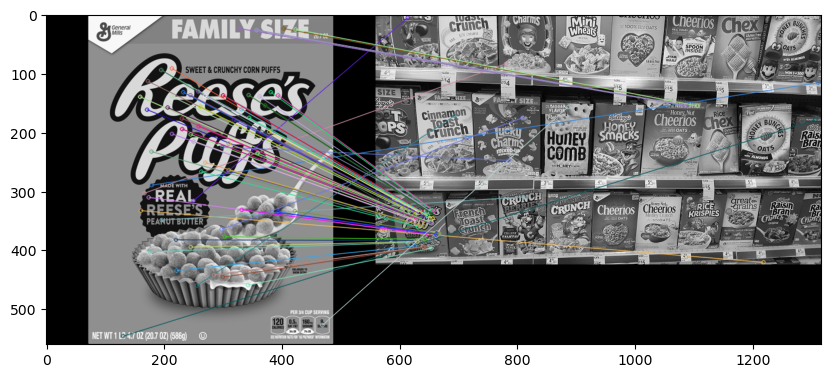

In [10]:
display(sift_matches)

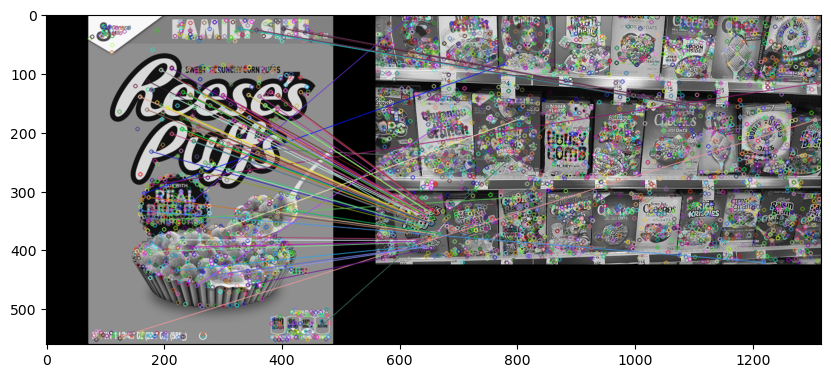

In [11]:
display(cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0))

---------
-------
## FLANN base Matcher

In [12]:
# create sift
sift = cv2.xfeatures2d.SIFT_create()

# find keypoints and descriptors with FLANN
kp1, des1 = sift.detectAndCompute(reeses, mask=None)
kp2, des2 = sift.detectAndCompute(cereals, mask=None)

# FLANN paramters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, tree = 5)
search_params = dict(check= 50) 

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

good = []

for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags= 0)

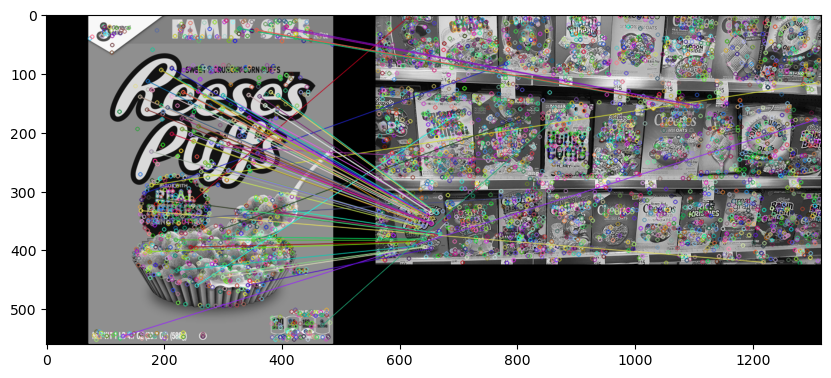

In [13]:
display(flann_matches)

In [14]:
# create sift
sift = cv2.xfeatures2d.SIFT_create()

# find keypoints and descriptors with Flann

kp1, des1 = sift.detectAndCompute(reeses, mask=None)
kp2, des2 = sift.detectAndCompute(cereals, mask=None)

# Flann PARAMTERS
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, tree = 5)
search_params = dict(check = 50)


flann = cv2.FlannBasedMatcher(index_params, search_params)

good = []

for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        
        
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags= 6)


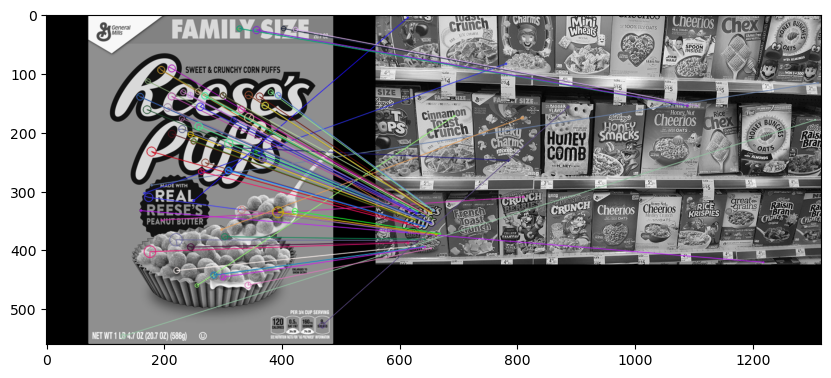

In [15]:
display(flann_matches)

In [16]:
# create sift
sift = cv2.xfeatures2d.SIFT_create()

# find keypoints and descriptors with FNN
kp1, des1 = sift.detectAndCompute(reeses, mask=None)
kp2, des2 = sift.detectAndCompute(cereals, mask=None)

# Flann Paramters
FLAN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, tree = 5)
search_params = dict(Checks= 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k =2)

# need to draw only good matches, to create a mask

matchesMask = [[0,0] for i in range(len(matches))]

# ratio  test
for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.75 * match2.distance:
        matchesMask[i] = [1,0]
        
draw_params = dict(matchColor =(0,0,255), 
                   singlePointColor = (255, 0,0), 
                   matchesMask = matchesMask, 
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

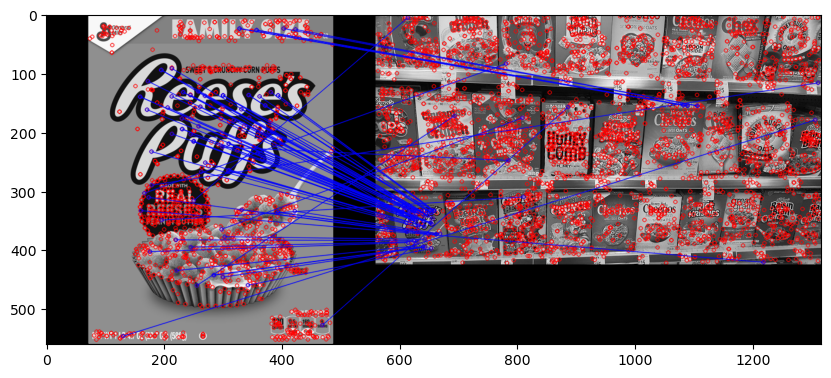

In [17]:
display(flann_matches)